Załadowanie bibliotek

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

#Ustalenie stylu wykresów jako ggplot
# plt.style.use('ggplot')
from sklearn import preprocessing
from sklearn import tree
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
import pydotplus
from IPython.display import Image  


Wczytanie danych

In [2]:
# Ustalenie ścieżki do datasetu
filename_mushrooms = './forestfires.csv'

# Wczytanie datasetu jako dataframe
mushrooms_dataframe = pd.read_csv(filename_mushrooms, sep=";")

# Wyświetlenie dataframe
display(mushrooms_dataframe)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.00
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.00
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.00
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.00
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.00


Zbiór danych ma 8124 wiersze i 23 kolumny (pierwsza kolumna to atrybut decyzyjny, a pozostałe 22 kolumny to atrybuty warunkowe). W celu dalszego zbadania datasetu i weryfikacji typów danych kategorycznych w każdej kolumnie, wypisano unikalne wartości każdej kolumny. Sprawdzono również, czy zbiór danych zawiera brakujące wartości lub niepotrzebne kolumny.

In [3]:
print("Liczba różnych wartości atrybutów wraz z ich wartościami dla każdej kolumny:")
for x in mushrooms_dataframe.columns:
    x_unique = mushrooms_dataframe[x].unique()
    print("{:>25}: {:>2} {}".format(x, x_unique.shape[0], x_unique))

Liczba różnych wartości atrybutów wraz z ich wartościami dla każdej kolumny:
                        X:  9 [7 8 6 5 4 2 9 1 3]
                        Y:  7 [5 4 6 3 2 9 8]
                    month: 12 ['mar' 'oct' 'aug' 'sep' 'apr' 'jun' 'jul' 'feb' 'jan' 'dec' 'may' 'nov']
                      day:  7 ['fri' 'tue' 'sat' 'sun' 'mon' 'wed' 'thu']
                     FFMC: 106 [ 86.2  90.6  91.7  89.3  92.3  91.5  91.   92.5  92.8  63.5  90.9  92.9
  93.3  84.9  89.2  86.3  91.8  94.3  90.2  93.5  91.4  92.4  93.4  88.6
  90.3  90.   88.1  79.5  94.8  90.1  94.2  87.2  87.6  92.1  92.6  84.
  86.6  93.   91.1  91.2  88.8  84.2  89.7  83.9  69.   82.1  85.9  84.4
  68.2  93.7  85.8  95.5  95.2  96.   85.6  81.5  86.8  93.9  90.8  90.7
  88.3  92.2  81.9  88.   83.   93.1  91.9  91.6  87.5  93.6  84.6  85.4
  84.7  86.9  85.2  90.4  53.4  85.1  89.6  50.4  88.2  92.   18.7  90.5
  84.1  85.   87.9  94.6  87.1  92.7  88.9  89.4  94.   75.1  91.3  93.2
  94.9  95.   95.1  95.8  95.9  96.

Zauważono, że spośród 22 atrybutów warunkowych, jedynie 'veil-type' zawiera tylko jedną wartość "p". Zatem atrybut ten nie zapewnia żadnej wartości dodanej do klasyfikatora. Podjęto decyzję o usunięciu tej kolumny - utworzono generyczny kod usuwający wszystkie kolumny zawierające jedną wartość.

In [4]:
# print("Rozmiar mushrooms_dataframe przed usunięciem: ",mushrooms_dataframe.shape)     

# # Usunięcie kolumn zawierających jedną wartośc
# for col in mushrooms_dataframe.columns.values:
#     col_unique = mushrooms_dataframe[col].unique()
#     if len(col_unique) == 1:
#         print("Usunięto kolumnę '{}',która zawiera tylko jedną wartość: {}".format(col, col_unique[0]))
#         mushrooms_dataframe = mushrooms_dataframe.drop(col, 1)
        
# print("Rozmiar mushrooms_dataframe po usunięciu: ",mushrooms_dataframe.shape)

Stwierdzono również, że kolumna 'stalk-root' zawiera brakujące wartości. Zbadano udział brakujących wartości w zbiorze - utworzono generyczny kod badający udziały brakująych wartości.

In [5]:
# for x in mushrooms_dataframe.columns:
#     x_unique = mushrooms_dataframe[x].unique()
#     if '?' in x_unique:
#         column = mushrooms_dataframe[x]
#         column_count = column.count()
#         column_value_count = column.value_counts()

#         print("Liczba obiektów w zależności od kategorii i ich udział procentowy dla klasy '{}':\n".format(x))
#         stat = column_value_count.to_frame()
#         stat['percent'] = 100. * column_value_count / column_count
#         print(stat)

#         fig = plt.figure()
#         fig.patch.set_facecolor('xkcd:white')
#         ax = sns.countplot(x=x, data=mushrooms_dataframe)
#         ax.set_title("Liczba obiektów w zależności od kategorii dla '{}'".format(x))
        
# #         for p in ax.patches:
# #             height = p.get_height()
# #             ax.text(p.get_x()+0.25, height+ 3, 'n=%.0f'%(height))
        
#         for p in ax.patches:
#             ax.annotate('{:.0f}\n({:.2f}%)'.format(p.get_height(),
#                                                    100. * p.get_height() / column_count),
#                                                    (p.get_x()+0.05, p.get_height()//2))
#         plt.show()


Możliwe działania do podjęcia w pzypadku występowania brakujących danych to m.in. usunięcie kolumn lub wierszy zawierających brakujące dane, wypełninie brakujących wartości inną wartościa np. z poprzedniej lub następnej komórki. Stwierdzono, że udzial procentowy brakujących wartości ('?') dla atrybutu 'stalk-root' wynosi ponad 30,5%. Podjeto decyzję sporządzeniu dwóch wersji zbioru danych: z usuniętymi wierszami oraz z usuniętymi kolumnami zawierającymi brakujące wartości.

Utworzono generyczny kod oczyszczający zbiór danych z wierszy zawierających brakujące wartości:

In [6]:
# # Wykonanie kopii danych
# mushrooms_dataframe_dropped_rows = mushrooms_dataframe.copy(deep=True)

# # Usunięcie wierszy
# for x in mushrooms_dataframe_dropped_rows.columns:
#     to_delete_count = mushrooms_dataframe_dropped_rows[mushrooms_dataframe_dropped_rows[x] == '?'].shape[0]
#     if to_delete_count > 0:
#         mushrooms_dataframe_dropped_rows = mushrooms_dataframe_dropped_rows[mushrooms_dataframe_dropped_rows[x] != '?']
#         print("W kolumnie '{}' usunięto {} wierszy zawierających brakujące wartości.".format(x, to_delete_count))

# print("mushrooms_dataframe_dropped_rows: ",mushrooms_dataframe_dropped_rows.shape)

# print("\n Podział atrybutu decyzyjnego:")
# print(mushrooms_dataframe_dropped_rows['classes'].value_counts())

Utworzono generyczny kod oczyszczający zbiór danych z kolumn zawierających brakujące wartości powyżej zadanego progu procentowego (25%):

In [7]:
# # Próg procentowy usuwania kolumn z brakującymi wartościami
# drop_percentage = 0.25

# # Wykonanie kopii danych
# mushrooms_dataframe_dropped_cols = mushrooms_dataframe.copy(deep=True)

# # Zastąpienie znaku ? wartością nan
# for col in mushrooms_dataframe_dropped_cols:
#     mushrooms_dataframe_dropped_cols.loc[mushrooms_dataframe_dropped_cols[col] == '?', col] = np.nan

# # Usunięcie kolumn
# for col in mushrooms_dataframe_dropped_cols.columns.values:
#     no_rows = mushrooms_dataframe_dropped_cols[col].isnull().sum()
#     percentage = no_rows / mushrooms_dataframe_dropped_cols.shape[0]
#     if percentage >= drop_percentage:
#         del mushrooms_dataframe_dropped_cols[col]
#         print("Kolumna '{}' zawierająca {} brakujących wartości ({}% procent zbioru) została usunięta.".format(col, no_rows, percentage))
        
# print("mushrooms_dataframe_dropped_cols: ",mushrooms_dataframe_dropped_rows.shape)

# print("\n Podział atrybutu decyzyjnego:")
# print(mushrooms_dataframe_dropped_cols['classes'].value_counts())

Przed przystąpieniem do budowy drzewa decyzyjnego należy zakodować wartości atrybutów (kolumn). Do zakodowania wartości kategorycznych użyta zostanie technika kodowania etykiet, która konwertuje każdą wartość w kolumnie na liczbę.

In [8]:
mushrooms_dataframe_dropped_rows = mushrooms_dataframe
mushrooms_dataframe_dropped_cols = mushrooms_dataframe

print('Kodowanie danych z usuniętymi wierszami:')
le_rows = preprocessing.LabelEncoder()
for column in mushrooms_dataframe_dropped_rows.columns:
    mushrooms_dataframe_dropped_rows[column] = le_rows.fit_transform(mushrooms_dataframe_dropped_rows[column])

print("Liczba różnych wartości atrybutów wraz z ich wartościami dla każdej kolumny po zakodowaniu:")
for x in mushrooms_dataframe_dropped_rows.columns:
    x_unique = mushrooms_dataframe_dropped_rows[x].unique()
    print("{:>25}: {:>2} {}".format(x, x_unique.shape[0], x_unique))

print('\n\nKodowanie danych z usuniętymi kolumnami:')    
le_cols = preprocessing.LabelEncoder()
for column in mushrooms_dataframe_dropped_cols.columns:
    mushrooms_dataframe_dropped_cols[column] = le_cols.fit_transform(mushrooms_dataframe_dropped_cols[column])

print("Liczba różnych wartości atrybutów wraz z ich wartościami dla każdej kolumny po zakodowaniu:")
for x in mushrooms_dataframe_dropped_cols.columns:
    x_unique = mushrooms_dataframe_dropped_cols[x].unique()
    print("{:>25}: {:>2} {}".format(x, x_unique.shape[0], x_unique))

Kodowanie danych z usuniętymi wierszami:
Liczba różnych wartości atrybutów wraz z ich wartościami dla każdej kolumny po zakodowaniu:
                        X:  9 [6 7 5 4 3 1 8 0 2]
                        Y:  7 [3 2 4 1 0 6 5]
                    month: 12 [ 7 10  1 11  0  6  5  3  4  2  8  9]
                      day:  7 [0 5 2 3 1 6 4]
                     FFMC: 106 [ 28  56  67  46  73  65  60  75  78   3  59  79  83  20  45  29  68  91
  52  85  64  74  84  42  53  50  39   7  95  51  90  34  36  71  76  14
  30  80  61  62  43  16  49  13   5  11  27  17   4  87  26 100  99 103
  25   8  31  88  58  57  41  72  10  38  12  81  69  66  35  86  18  24
  19  32  23  54   2  22  48   1  40  70   0  55  15  21  37  94  33  77
  44  47  89   6  63  82  96  97  98 101 102 105 104  93   9  92]
                      DMC: 215 [ 37  49  56  48  66  93  98 167 149  95  79  77 147 154 164  50  47  44
  41  84 110 130 162 166 138 171  92 104  76  82  85  54  36  72 112 127
  88  74  33  67 1

Mająć zakodowane dane, należy dokonać ich podziału na atrybuty warunkowe (zmienna X_\*) i decyzyjne (zmienna Y_\*).

In [9]:
X_dropped_rows = mushrooms_dataframe_dropped_rows.drop(['area'], axis=1)
Y_dropped_rows = mushrooms_dataframe_dropped_rows['area']

X_dropped_cols = mushrooms_dataframe_dropped_cols.drop(['area'], axis=1)
Y_dropped_cols = mushrooms_dataframe_dropped_cols['area']

Kolejnym podziałem, który należy wykonać, jest podział danych na część treningową i testową. Założono, że rozmiar części testowej będzie wynosił 33% wszystkich danych. W celu zachowania powtarzalności wyników parametr random_state ustawiono na wartość 30 (ustawienie innej wartości bedzie powodowąło wygnerowanie innego podziału danych i innego drzewa decyzyjnego).

In [10]:
random_state = 30

X_train_dr, X_test_dr ,Y_train_dr, Y_test_dr = train_test_split(X_dropped_rows, Y_dropped_rows, test_size = 0.33, random_state=random_state)

X_train_dc, X_test_dc ,Y_train_dc, Y_test_dc = train_test_split(X_dropped_cols, Y_dropped_cols, test_size = 0.33, random_state=random_state)

Utworzono funkcję sprawdzającą jakość klasyfikacji zbudowanego drzewa, funkcję budującą drzewo oraz funkcję sprawdzająca istotność atrybutu. Funkcji sprawdzająca jakość klasyfikacji zbudowanego drzewa, wypisuje wartości Accuracy, czyli współczynnik dokładności modelu do danych testowych, Precision - procent elementów będących istotnymi oraz Recall - procent istotnych elementów, które zostały wybrane.

In [13]:
def test_tree(clf, X_train, X_test, Y_train, Y_test, print_res=True):
    clf       = clf.fit(X_train, Y_train)
    score     = clf.score(X_test, Y_test)
    precision = metrics.precision_score(Y_test, clf.predict(X_test))
    recall    = metrics.recall_score(Y_test, clf.predict(X_test))
    res = (score, precision,recall)
    if print_res:
        print("Accuracy = %f / Precision = %f / Recall = %f" % res)
    return res

def build_tree(X, X_train, X_test, Y_train, Y_test, random_state, **kwargs):
    clf = tree.DecisionTreeRegressor(random_state=random_state, **kwargs)
    clf = clf.fit(X_train, Y_train)

    dot_data = tree.export_graphviz(clf, out_file=None,  
                                    feature_names=X.columns, 
                                    class_names=['p','e'],
                                    filled=True, rounded=True,  
                                    special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data)  
    display(Image(graph.create_png()))
    
    test_tree(clf, X_train, X_test, Y_train, Y_test);
    
    return clf

def attribute_importance(clf, X):
    attrs = X.columns.values
    attr_importance = clf.feature_importances_
    sorted_attr_importance = np.argsort(attr_importance)
    range_sorted_attr_importance = range(len(sorted_attr_importance))
    
    plt.figure(figsize=(8, 7))
    plt.barh(range_sorted_attr_importance, attr_importance[sorted_attr_importance])
    plt.yticks(range_sorted_attr_importance, attrs[sorted_attr_importance])
    plt.xlabel('Importance')
    plt.title('Attribute importances')
    plt.draw()
    plt.show()

W oparciu o przygotowane dane zbudowano drzewa decyzyjne.

1. Dokonano klasyfikacji zbioru danych z usuniętymi wierszami, które zawierały braki danych:

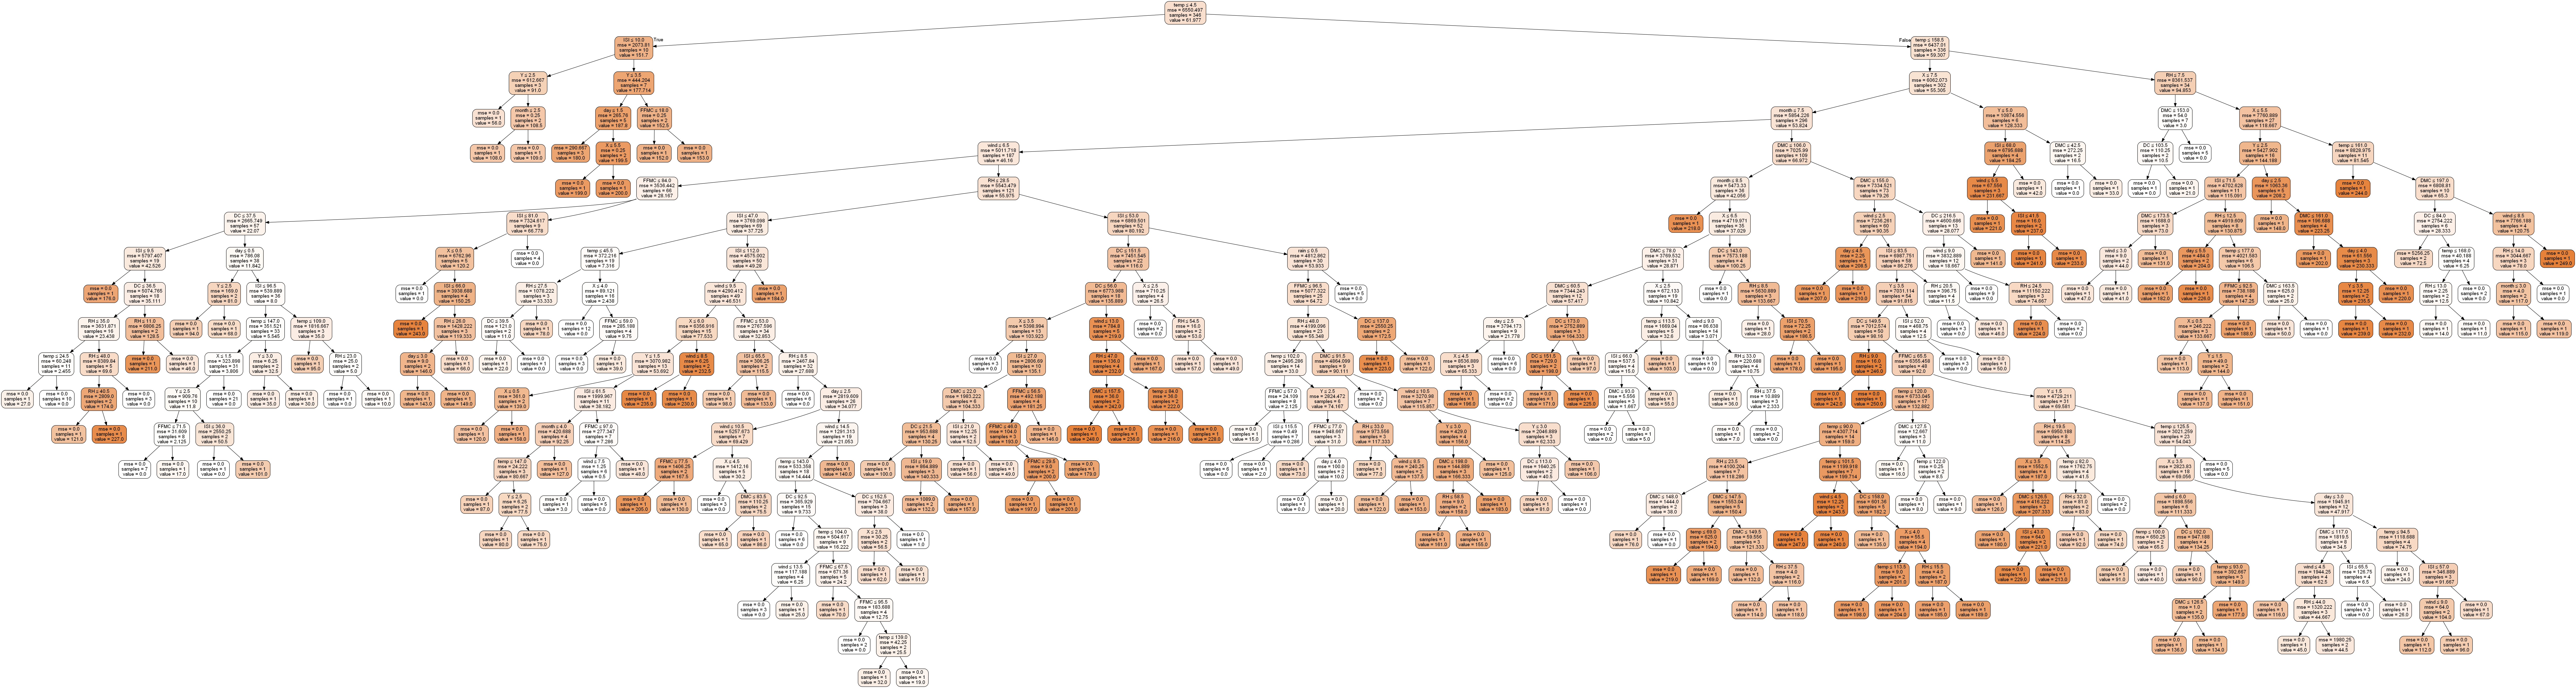

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

In [14]:
clf = build_tree(X_dropped_rows, X_train_dr, X_test_dr, Y_train_dr, Y_test_dr, random_state)

In [ ]:
attribute_importance(clf, X_dropped_rows)

Wygenerowane drzewo decyzyjne posiada głębokość wynoszącą 5. Ponadto zauważono, że najważnijszymi atrybutami są: spore-print-color oraz gill-size. Mniejsze znaczenie mają atrybuty: habitat, stalk-shape oraz cap-surface. Pozostałe atrybuty uznano za nieznaczące.

2. Dokonano klasyfikacji zbioru danych z usuniętymi kolumnami, które zawierały braki danych:

In [ ]:
clf = build_tree(X_dropped_cols, X_train_dc, X_test_dc ,Y_train_dc, Y_test_dc, random_state)

In [ ]:
attribute_importance(clf, X_dropped_cols)

Zauważono, że drzewo wygenerowane przy użyciu danych z usuniętymi kolumnami jest bardziej rozbudowano niż drzewo wygenerowane przy użyciu danych z usuniętymi wierszami, ponieważ zostało ono skonstruowano przy użyciu zbioru o większej liczbie próbek. Wygenerowane drzewo decyzyjne posiada głębokość wynoszącą 7. Zauważono również, że najważnijszymi atrybutami są: gill-color, spore-print-color, population oraz gill-size. Mniejsze znaczenie mają atrybuty: odor, stalk-shape, habitat oraz stalk-color-above-ring. Pozostałe atrybuty uznano za nieznaczące.


Do kolejnych eksperymentów użyto z usuniętymi kolumnami, ponieważ założono że większy zbiór danych może lepiej odzwierciedlać problem klasyfikacji grzybów.


3. Dokonano klasyfikacji zbioru danych z usuniętymi kolumnami ze zmienionymi parametrami. Parametry dobierano tak, aby zmnijeszyć wielkość drzewa decyzyjnego, jednocześnie zachowujać wysoką jakość klasyfikacji. Podczas ekspoerymentów zauważono, że w przypadku analizowanego zbioru dancych kryterium podziału nie ma istotnego wpływu na wygląd i jakość drzewa. 

In [ ]:
clf = build_tree(X_dropped_cols, X_train_dc, X_test_dc ,Y_train_dc, Y_test_dc, random_state,
                 criterion="gini", max_depth=2, min_samples_split=200, min_samples_leaf=60, max_leaf_nodes=5)

In [ ]:
attribute_importance(clf, X_dropped_cols)

Ustalenie własnych parametrów drzewa decyzyjnego pozwoliło zmnijeszyć jego głębokość do 3, przy jednoczesnym zachowaniu dobrej jakości klasyfikacji. Współczynnik dokładności zmnijeszym się jedynie do około 94%, wartość Precission do około 91%, a Recall do około 95%. Zauważono również, że najważnijesze atrybutty, tj. gill-color, spore-print-color, population oraz gill-size zostały zachowane.